In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 1. Dataset


We will be using a public data set in Kaggle in csv format. This Dataset is Google Play Store Apps.

To import the dataset to the current environment do the following steps:

Click "+ Add Data" in the top right corner of this Kaggle notebook.
Search "Google Play" in the search box.
Click Add on the first record (uploaded by Lavanda Gupta).
There will be a new folder in /kaggle/input/ containing the dataset.
Jupyter Magic Commands: You can execute linux shell commands in this notebook by preceding the command with '!' character.

to list files in the current directory you can execute in a cell:

!ls -la

In [1]:
!pwd

/kaggle/working


## Importing libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Acquire data

In [3]:
# First challenge: Try to read the csv files and store them in 2 diferent dataframes dataframe
df_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
df_apps = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")



# 3. Intro: Wrangle, prepare, cleanse the data.

## Explore data

We will be focusing on the Apps dataset, leaving the Reviews one for the more advanced training

In [ ]:
# Visualizing first 5 rows of the dataset
df_apps.head()

In [ ]:
# Try to visualize now 10 rows instead
df_apps.head(10)

In [ ]:
# Dimensions of the apps dataframe: 13 columns, 10841 samples
df_apps.shape

In [ ]:
# Types of each column
df_apps.info()

In [ ]:
# Statistics of the dataframe. Only numerical columns are taken into account
df_apps.describe()

In [ ]:
# To list all the colums
df_apps.columns

In [ ]:
#print number of unique values for each column
df_apps.nunique()
   
    

In [ ]:
# if we want to rename a column df_apps.rename(columns={'App':'App Name'}, inplace=True)

It's often useful to delete (drop) the columns that we are not going to use. We free up memory and also analytical complexity.

In [ ]:
#Let's drop for instance the version of the app, which for our analysis is not going to be useful.
df_apps = df_apps.drop("Current Ver", axis=1)

#The axis parameter determines whether we are dropping a column (1) or a row (0). 0 is default.

# This is equivalent to use the parameter inplace = True. In this way it will get saved in the dataframe directly
# df_apps.drop("Current Ver", axis=1, inplace=True)

In [ ]:
df_apps.head()

In [ ]:
# How many unique values has Category column have?
df_apps.Category.nunique()

In [ ]:
#List the unique values for Category
df_apps.Category.unique()

In [ ]:
#Alternative way to refer to a Pandas Series
df_apps['Category'].unique()

In [ ]:
# If we want to see all the rows that comply with certain condition, we can use loc
df_apps.loc[df_apps.Category == '1.9']

In [ ]:
# Another example
df_apps.loc[df_apps.Type == 'Free']

In [ ]:
df_apps['Type'].unique()

In [ ]:
# We can also select certain rows with iloc
df_apps.iloc[:5]

In [ ]:
# Use iloc too select row 10472
df_apps.iloc[10472]

In [ ]:
#We need to drop this sample as it's clearly corrupted.
df_apps = df_apps.drop(10472).reset_index().drop("index", axis=1)

In [ ]:
df_apps.info()

In [ ]:
#Let's identify more corrupt entries with data that we know should not be possible

#First we create the mask
mask = df_apps.Rating > 4
mask

In [ ]:
df_apps.loc[mask]

In [ ]:
mask_rating = df_apps.Rating < 4
mask_rating

In [ ]:
df_apps.loc[mask_rating]

In [ ]:
# What are all the possible values of Size and Installs?
df_apps['Size'].unique()


In [ ]:
#What percentage of apps are free?
# Your code here

In [ ]:
# Drop "Android Ver" and "Genres" column.
df_apps = df_apps.drop("Android Ver", axis=1)
df_apps = df_apps.drop("Genres", axis=1)

In [ ]:
# Let's see what fields are included in the other dataframe
df_reviews.columns

## 4. Analyze, identify patterns, and explore the data.

### Type

In our previous analysis (and also, because we have phones and apps ourselves) we know there are 2 types of app: Free and Paid. Not many people like to pay for apps, so we also analyzed that there are many more Free apps in the marketplace than paid. Let's visualize it.

In [ ]:
df_apps.head(1)

In [ ]:
df_apps['Type'].value_counts()

In [ ]:
# Let's have a look at the total number of applications that are free vs paid
df_apps['Type'].value_counts().plot(kind="bar")

In [12]:
#Let's also go into the Rating of our apps. We have been tasked to plot the average rating of our apps per each of the categories
#First, let's select the subset of our dataframe that we are interested in.
df_cat_rating = df_apps[['Category','Rating']]
df_cat_rating.head()

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3


In [13]:
df_cat_rating

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10831,FAMILY,4.5
10832,FAMILY,5.0
10833,MEDICAL,NaN
10834,BOOKS_AND_REFERENCE,4.5


In [14]:
#Now let's calculate the mean for each 

df_rating_per_category = df_cat_rating.groupby('Category').mean()
df_rating_per_category.head(30)

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.160856
DATING,3.970769
EDUCATION,4.389032


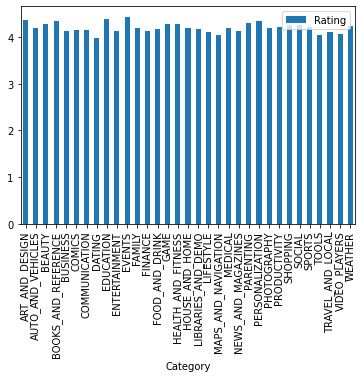

In [15]:
#Let's plot it now to see what's the result

df_rating_per_category.plot(kind='bar')

What issue(s) do we see in this visualization?

In [ ]:
# Let's improve the plot

df_rating_per_category_ordered = df_rating_per_category.sort_values("Rating")
df_rating_per_category_ordered.plot(kind="bar")
'''Still we have some issues.:
      1.- Most apps' ratings range from around 3.8 to 4.8.
      2.- The chart itself is very squished. We need more space. ''';

In [ ]:
# And even some more adjustements:

ax1 = df_rating_per_category_ordered.plot(kind='bar', figsize=(10,5))
ax1.set_ylim(3.5,5)

Let's see a different type of plot: the line plot.

In [ ]:
#Casting into datetime
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'])
df_apps.info()

In [ ]:
#Example of a lineplot. We see that the apps in our dataset were updated usually by a few months of the collection of the data (end of the lineplot)

df_apps[['Last Updated']].groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).count().plot(kind='line', figsize=(15, 5))


## 5. Data transformations.

In [ ]:
#Let's focus in the size of the app. If we are going to use this data in the future or quantify the size somehow, we need to do some arrangements.
df_apps[['Size']].head(15)

In [ ]:
df_apps['Size'].unique()

In [ ]:
#Let's simply cast it into an integer, and it should be fine.
df_apps.astype({'Size':'int32'})

In [ ]:
#... right? As we saw up there, we need to do some arrangements.
# First, we need to make our strings 'look like' numbers.

#We present you guys with the fuction apply:
df_apps['Size'] = df_apps['Size'].apply(size_to_int)

In [ ]:
def size_to_int(n):
    lastchar = n[-1:]
    if 'M' == lastchar:
        n = float(n[:-1])*1000
    elif 'k' == lastchar:
        n = float(n[:-1])
    else:
        n = None
    return n

In [ ]:
df_apps

In [ ]:
df_apps.info()

In [ ]:
#We can see how the average size of apps has increased consistently with the years.

df_apps[['Last Updated', 'Size']]\
    .groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).mean()\
    .plot(kind='line', figsize=(15, 5))


In [ ]:
#We should check if we have duplicates in our dataset and get rid of them.
duplicated_mask = df_apps.duplicated()
df_apps[duplicated_mask]

In [ ]:
df_apps[df_apps['App']=='TickTick: To Do List with Reminder, Day Planner']

In [ ]:
#Let's drop the duplicates
df_apps = df_apps.drop_duplicates()

In [ ]:
df_apps.head()

In [ ]:
df_apps.info()

Homework

In [4]:
#Show all the rows in df_apps with Rating less than 4

mask_rating = df_apps.Rating < 4
mask_rating

0        False
1         True
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [5]:
#Drop "Android Ver" and "Genres" column
df_apps = df_apps.drop("Android Ver", axis=1)
df_apps = df_apps.drop("Genres", axis=1)
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1


In [6]:
#prints the number of unique values for each column
df_apps.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Last Updated      1378
Current Ver       2832
dtype: int64

(3.5, 5.0)

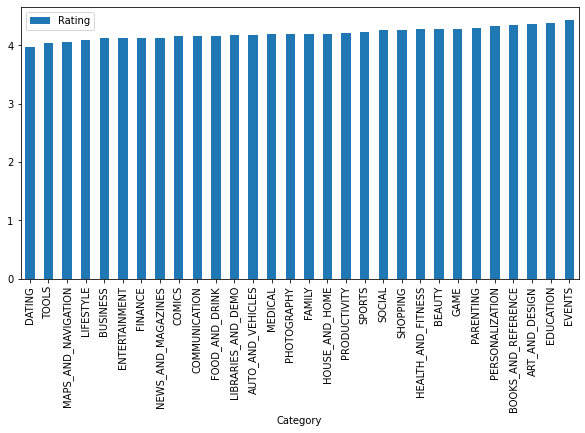

In [27]:
#Plot chart of category
df_apps = df_apps.drop(10472).reset_index().drop("index", axis=1)
df_cat_rating = df_apps[['Category','Rating']].groupby('Category').mean().head(30).sort_values("Rating").plot(kind='bar', figsize=(10,5)).set_ylim(3.5,5)



